In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
qiriro_swell_heart_rate_variability_hrv_path = kagglehub.dataset_download('qiriro/swell-heart-rate-variability-hrv')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/swell-heart-rate-variability-hrv/hrv dataset/quick_start.py
/kaggle/input/swell-heart-rate-variability-hrv/hrv dataset/papers/Koldijk et. al - 2018.pdf
/kaggle/input/swell-heart-rate-variability-hrv/hrv dataset/papers/Kizito et. al - 2019.pdf
/kaggle/input/swell-heart-rate-variability-hrv/hrv dataset/papers/Koldijk et al. - 2014pdf.pdf
/kaggle/input/swell-heart-rate-variability-hrv/hrv dataset/hrv dataset/quick_start.py
/kaggle/input/swell-heart-rate-variability-hrv/hrv dataset/hrv dataset/papers/Koldijk et. al - 2018.pdf
/kaggle/input/swell-heart-rate-variability-hrv/hrv dataset/hrv dataset/papers/Kizito et. al - 2019.pdf
/kaggle/input/swell-heart-rate-variability-hrv/hrv dataset/hrv dataset/papers/Koldijk et al. - 2014pdf.pdf
/kaggle/input/swell-heart-rate-variability-hrv/hrv dataset/hrv dataset/data/raw/rri/p17.txt
/kaggle/input/swell-heart-rate-variability-hrv/hrv dataset/hrv dataset/data/raw/rri/p7.txt
/kaggle/input/swell-heart-rate-variability-hrv/hrv dataset/hrv da

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Perceptron

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam

from xgboost import XGBClassifier

In [ ]:
train = pd.read_csv("/kaggle/input/swell-heart-rate-variability-hrv/hrv dataset/data/final/train.csv")
test = pd.read_csv("/kaggle/input/swell-heart-rate-variability-hrv/hrv dataset/data/final/test.csv")

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(train['condition'])
train['condition'] = le.transform(train['condition'])
e = test['condition'].unique()
test['condition'] = le.transform(test['condition'])

In [ ]:
f = le.transform(e)
print(f)

[1 2 0]


In [ ]:
g = le.inverse_transform(f)
print(g)
# 1 = no stress
# 2 = time pressure
# 0 = interruption

['no stress' 'time pressure' 'interruption']


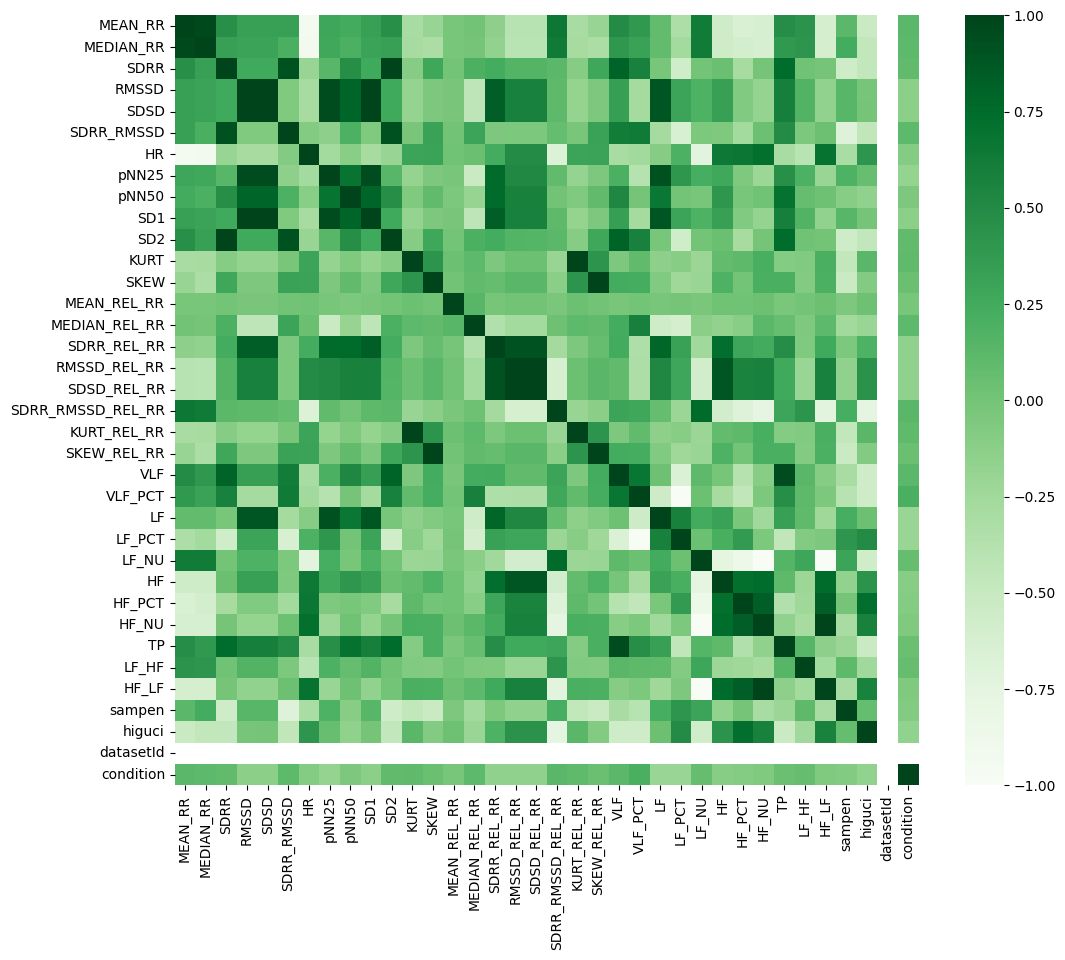

In [ ]:
plt.figure(figsize=(12,10))
corr = train.corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Greens)
plt.show()

In [ ]:
def feature_selection(correlation,threshold):
    selected_features = []
    for i in range(corr.shape[0]):
      if corr.iloc[i,35] > threshold:
        selected_features.append(train.iloc[:,i])
    return pd.DataFrame(selected_features).T

In [ ]:
train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,1
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,0
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,0
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,1
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,1


In [ ]:
CORRELATION_THRESHOLD = 0.1
nn_train = train.copy()
reduced_train = feature_selection(corr,CORRELATION_THRESHOLD)
reduced_train.head()

,MEAN_RR,MEDIAN_RR,SDRR_RMSSD,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,VLF,VLF_PCT,condition
0,885.157845,853.763730,9.063146,-0.000179,2.143342,2661.894136,72.203287,1.0
1,939.425371,948.357865,6.272369,0.000611,2.930855,2314.265450,76.975728,0.0
2,898.186047,907.006860,5.182201,-0.000263,2.127053,1373.887112,51.152225,0.0
3,881.757865,893.460030,5.748591,0.000494,2.050988,2410.357408,70.180308,1.0
4,809.625331,811.184865,3.266724,-0.002736,1.816544,1151.177330,43.918366,1.0


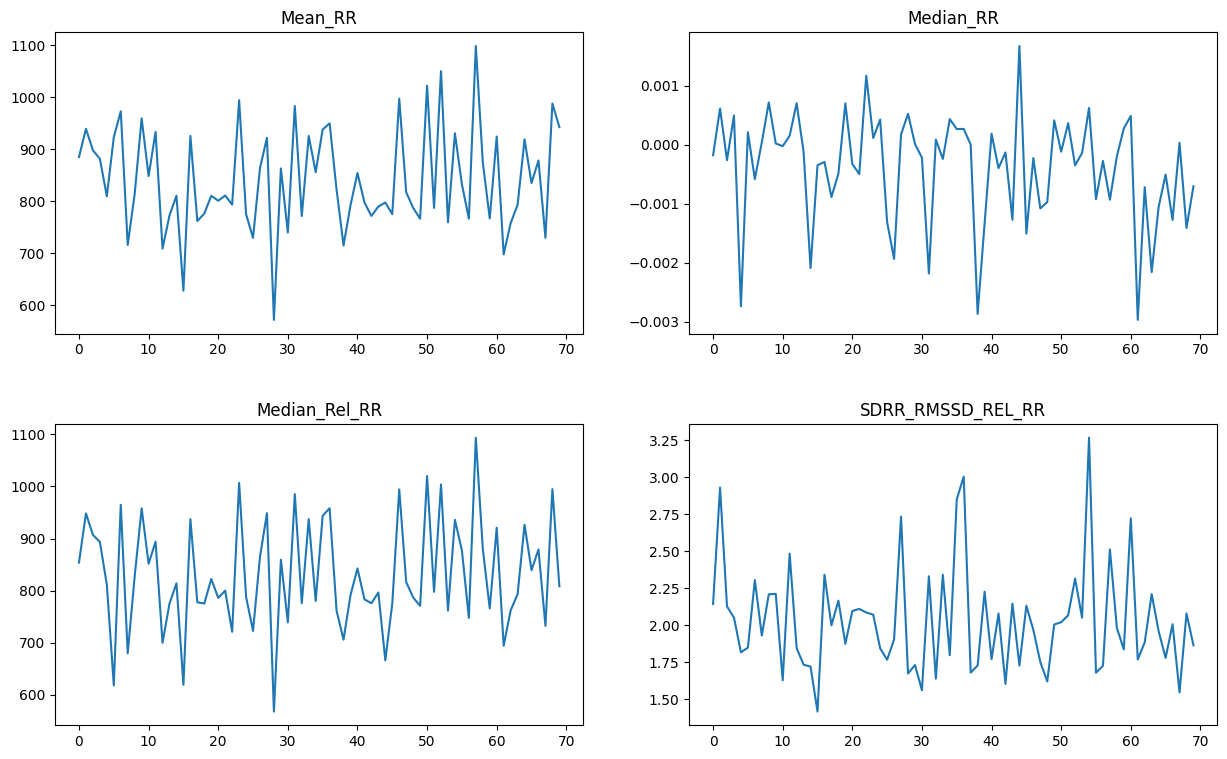

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 9))
reduced_train['MEAN_RR'][:70].plot(ax=axarr[0][0])
reduced_train['MEDIAN_RR'][:70].plot(ax=axarr[1][0])
reduced_train['MEDIAN_REL_RR'][:70].plot(ax=axarr[0][1])
reduced_train['SDRR_RMSSD_REL_RR'][:70].plot(ax=axarr[1][1])
axarr[0][0].set_title("Mean_RR")
axarr[0][1].set_title("Median_RR")
axarr[1][0].set_title("Median_Rel_RR")
axarr[1][1].set_title("SDRR_RMSSD_REL_RR")
plt.subplots_adjust(hspace=.3)

<Axes: >

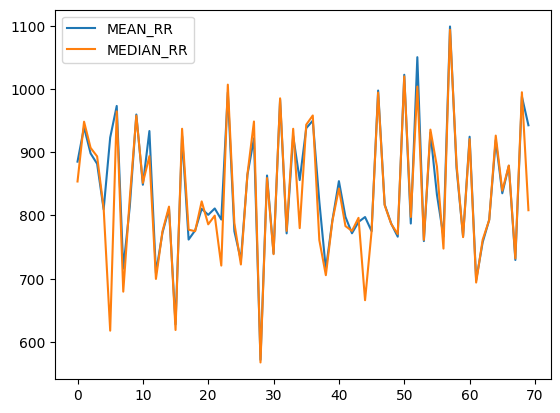

In [ ]:
reduced_train[['MEAN_RR','MEDIAN_RR']][:70].plot()


In [ ]:
x_train = reduced_train.iloc[:,:-1]
y_train = reduced_train.iloc[:,-1]

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [ ]:
def sample_data(X, y, sample_size=20000, random_state=42):
    if len(X) > sample_size:
        X_sample, _, y_sample, _ = train_test_split(X, y, train_size=sample_size, stratify=y, random_state=random_state)
        return X_sample, y_sample
    return X, y

In [ ]:
x_train_sample, y_train_sample = sample_data(x_train, y_train, sample_size=20000)


In [ ]:
x_test = test[x_train.columns]
y_test = test['condition']

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_sample)
x_test_scaled = scaler.transform(x_test)

In [ ]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=0, probability=True)


In [ ]:
from sklearn.metrics import confusion_matrix

# Fitting the SVM model
print(f"Fitting SVM on {len(x_train_sample)} samples...")
svm_model.fit(x_train_scaled, y_train_sample)

# Making predictions on the full test set
print("Making predictions on the full test set...")
svm_prediction = svm_model.predict(x_test_scaled)

# Printing the classification report
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_prediction))

# Calculate metrics
svm_accuracy = accuracy_score(y_test, svm_prediction)
svm_precision = precision_score(y_test, svm_prediction, average='weighted')
svm_recall = recall_score(y_test, svm_prediction, average='weighted')
svm_f1 = f1_score(y_test, svm_prediction, average='weighted')

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, svm_prediction))


Fitting SVM on 20000 samples...
Making predictions on the full test set...

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.79     11782
           1       0.81      0.95      0.88     22158
           2       0.88      0.58      0.70      7093

    accuracy                           0.83     41033
   macro avg       0.84      0.76      0.79     41033
weighted avg       0.83      0.83      0.82     41033


Confusion Matrix:
[[ 8737  2807   238]
 [  795 21023   340]
 [  940  2012  4141]]


In [ ]:
confusion_matrix = np.array([[ 8737,  2807,   238],
                              [  795, 21023,   340],
                              [  940,  2012,  4141]])

In [ ]:
import matplotlib.pyplot as plt

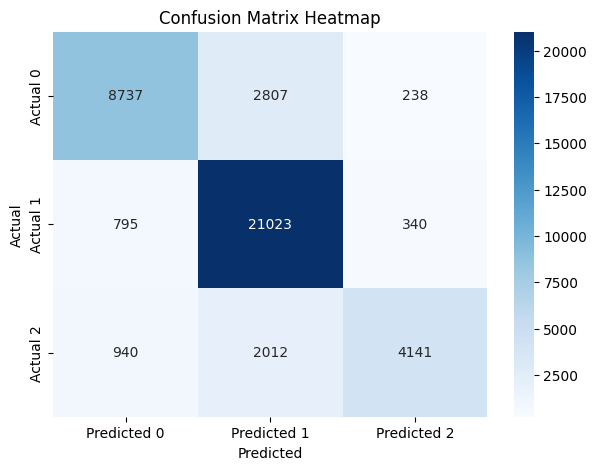

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'],
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:

# Enhanced Correlation Heatmap
plt.figure(figsize=(14, 12))
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Enhanced Correlation Heatmap of Training Data', fontsize=16)
plt.show()

# Enhanced Line Plots for Feature Trends
fig, axarr = plt.subplots(2, 2, figsize=(15, 10))
features = ['MEAN_RR', 'MEDIAN_RR', 'MEDIAN_REL_RR', 'SDRR_RMSSD_REL_RR']
for i, feature in enumerate(features):
    ax = axarr[i // 2][i % 2]
    sns.lineplot(data=reduced_train[feature][:70], ax=ax, color='darkblue')
    ax.set_title(f'Trend of {feature}', fontsize=14)
    ax.set_xlabel('Sample Index')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

# Enhanced Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Predicted 0', 'Predicted 1', 'Predicted 2'],
            yticklabels=['Actual 0', 'Actual 1', 'Actual 2'])
plt.title('Enhanced Confusion Matrix Heatmap', fontsize=16)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
